In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')

>> #### Import Libraries

In [3]:
import sys
import os

import numpy as np 
import pandas as pd

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

>> #### Import required modules

In [4]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from load_data import LoadData
from plot import Plot
from overview import Overview
from preprocessing import PreProcess
from model import Model

Initialize load data

In [5]:
loader = LoadData()
plot = Plot()
model = Model()

Load data from csv file using DVC

In [ ]:
# Get URL from DVC
data_path = '../data/data.csv'
repo = 'https://github.com/jedisam/Causal_inference/'
version = 'bee80042c3c966ec98d90c247a8ccac0e5fd8aca'

In [ ]:
# Load train data from dvc using the dvc.api.Dataset class
data_url = dvc.api.get_url(
    path=data_path,
    repo=repo,
    rev=version
)

In [6]:
data = loader.read_csv("../data/data_clean.csv")

In [7]:
overview = Overview(data)
prep = PreProcess(data)

In [8]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.22862,0.28241,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.22862,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.62695,0.6869,0.2575,0.41915,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678,1


In [9]:
data.shape
# number of data points
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")

 There are 569 rows and 31 columns


In [10]:
# Count missing values
overview.percent_missing(data)

The dataset contains 0.0 % missing values.


In [11]:
data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['diagnosis'], test_size = 0.2, random_state = 42)

>> #### Scale the data

In [13]:
scale = RobustScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

Models Definition

Before Feature Extraction

In [24]:
models = {"Logistic regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Linear SVC": LinearSVC(),
          "Random Forest": RandomForestClassifier()}

In [26]:
scores = model.train_score(models = models,
                   X_train = X_train,
                   X_test = X_test,
                   y_train = y_train,
                   y_test = y_test)

scores

{'Logistic regression': 0.9912280701754386,
 'KNN': 0.956140350877193,
 'Linear SVC': 0.9649122807017544,
 'Random Forest': 0.9649122807017544}

It can be seen that the highest score is obtained from logisitc model classification.

Feature Extraction

Feature Extraction using PCA

Principal Component Analysis is a way to reduce the number of variables while maintaining the majority of the important information. It transforms a number of variables that may be correlated into a smaller number of uncorrelated variables, known as principal components.

In [27]:
pca = PCA()
pca.fit(X_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
fig = px.line(x=np.arange(1,exp_var_cumul.shape[0]+1), y=exp_var_cumul, markers=True, labels={'x':'# of components', 'y':'Cumulative Explained Variance'})
fig.show()

The variance starts to decline after the fifth principal component is obtained. So, we can use the fifth principal component to reduce the number of variables.

In [28]:
pca = PCA(n_components=5)
pca.fit(X_train)

PCA(n_components=5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['diagnosis'], test_size = 0.2, random_state = 42)

scale = RobustScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [62]:
scores = pca.transform(data.iloc[:,:-1])
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2','PC3', 'PC4', 'PC5'])
target = pd.Series(data['diagnosis'], name='target')
result_df = pd.concat([scores_df, target], axis=1)
result_df.head()

,PC1,PC2,PC3,PC4,PC5,target
0,945.681233,-752.335552,-54.174383,139.108934,46.687726,1
1,1005.536773,-805.948565,-48.858209,161.723028,45.673709,1
2,904.000014,-721.851813,-40.643386,144.200253,35.013463,1
3,320.317778,-253.312247,-19.474882,48.138633,-7.223007,1
4,890.035836,-712.053885,-33.740554,149.436119,44.481901,1


In [63]:
X_train, X_test, y_train, y_test = train_test_split(scores, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=42)

Scaling the data

In [64]:
scale = RobustScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

Training the model after Feature Extraction

In [66]:
scores = model.train_score(models = models,
                   X_train = X_train,
                   X_test = X_test,
                   y_train = y_train,
                   y_test = y_test)

scores

{'Logistic regression': 0.9385964912280702,
 'KNN': 0.9385964912280702,
 'Linear SVC': 0.9473684210526315,
 'Random Forest': 0.956140350877193}

In [14]:
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)
val_accuracy = lr_model.score(X_test, y_test)

In [16]:
ad = data.drop(['diagnosis'], axis=1)

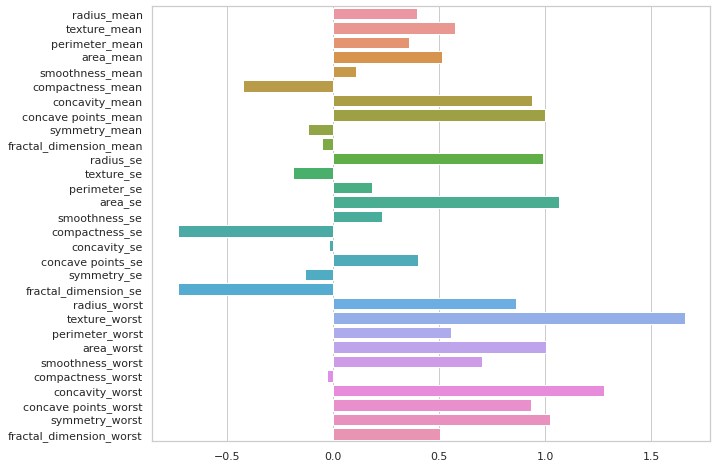

In [19]:
model.feature_importance(ad, lr_model)

Based on the feature importance, we can see that the most important features are the ones that are most correlated with the target variable.
These are:

    > 'concave points_mean',
    > 'texture_mean',
    > 'concavity_mean',


    > 'concave points_mean',
    > 'radius_se',
    > 'radius_worst',
    > 'concave points_worst',
    > 'perimeter_worst',
    > 'area_mean',
    > 'area_worst',
    > 'perimeter_mean',
    > 'radius_mean'